**Breast Cancer Prediction**

Predicting whether the patient is in the stage of Breast Cancer M (Malignant = 1) and B (Bengin = 0) using the K-Nearest Neighbors Classifier(KNN) algorithm

In [ ]:
# Importing the Required Libraries for data analysis

import numpy as np   # Linear algebra
import pandas as pd  # Data processing, CSV file I/O (e.g. pd.read_csv), data manipulation as in SQL
import matplotlib.pyplot as plt # Used for the plot the graph
import seaborn as sns  # Used for plot interactive graph
import warnings
warnings.simplefilter(action='ignore') # Hide warinings if any

# Configures matplotlib to show figures embedded in the notebook
%matplotlib inline

from matplotlib import rcParams  # Restore the standard matplotlib default settings
from matplotlib.cm import rainbow # Creating colormap in matplotlib

from sklearn.preprocessing import StandardScaler #Standardize features by removing the mean and scaling to unit variance

# Load the datset
data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data Breat Cancer/data.csv')

**Data Exploration**

Import the dataset to enviroment using https://www.kaggle.com/uciml/breast-cancer-wisconsin-data

Reading the dataset

In [ ]:
# Print the number of columns and rows
print("This dataset contains {} rows and columns {}".format(data.shape[0],data.shape[1]))
data.head()

This dataset contains 569 rows and columns 33


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


**Data Preprocessing**

Asigning M=1 and B= 0

In [ ]:
# Drop unnecessary columns
#data.drop(['id', 'Unnamed: 32'], axis=1, inplace=True)
# Print the number of columns and rows
#print("This dataset contains {} rows and columns {}".format(data.shape[0],data.shape[1]))

# Change the target to numerical for help in the statistics
#data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})

data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


Reading the dataset after dropping the unnecessary colomns

In [ ]:
# Drop unnecessary columns
data.drop(['id', 'Unnamed: 32'], axis=1, inplace=True)
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
# Print the number of columns and rows
print("This dataset contains {} rows and columns {}".format(data.shape[0],data.shape[1]))

This dataset contains 569 rows and columns 31


In [ ]:
# Check the data types of data
data.info()

# Check for existing null values
total_null_values= sum(data.isnull().sum())
print(total_null_values)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [ ]:
# Display the detailed information of each and every attributes in the data set
data.describe().transpose()


,count,mean,std,min,25%,50%,75%,max
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
fractal_dimension_mean,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


Grouping the cancer stage

In [ ]:
#Get the details of grouped cancer stage
data.groupby('diagnosis').mean()


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,,,,,,,,,,,,,,,,,,,,,
B,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442
M,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530


**Data Visualization**

Checking the dignosis stages using Countplot _ Malignant (M = 1) and Bengin (B = 0)

<Axes: xlabel='count', ylabel='diagnosis'>

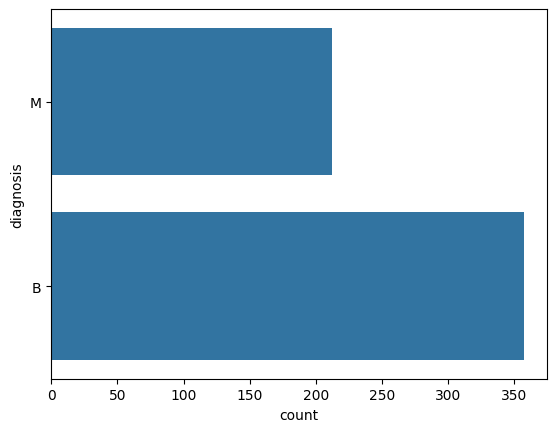

In [ ]:
# Get the frequency of cancer stages
sns.countplot(data['diagnosis'],label="Count")

Above "countplot graph" displays that there is a more number of patients in bengin stage of cancer which can be cured.

**Scatter Plot Matrix Data Visualization**

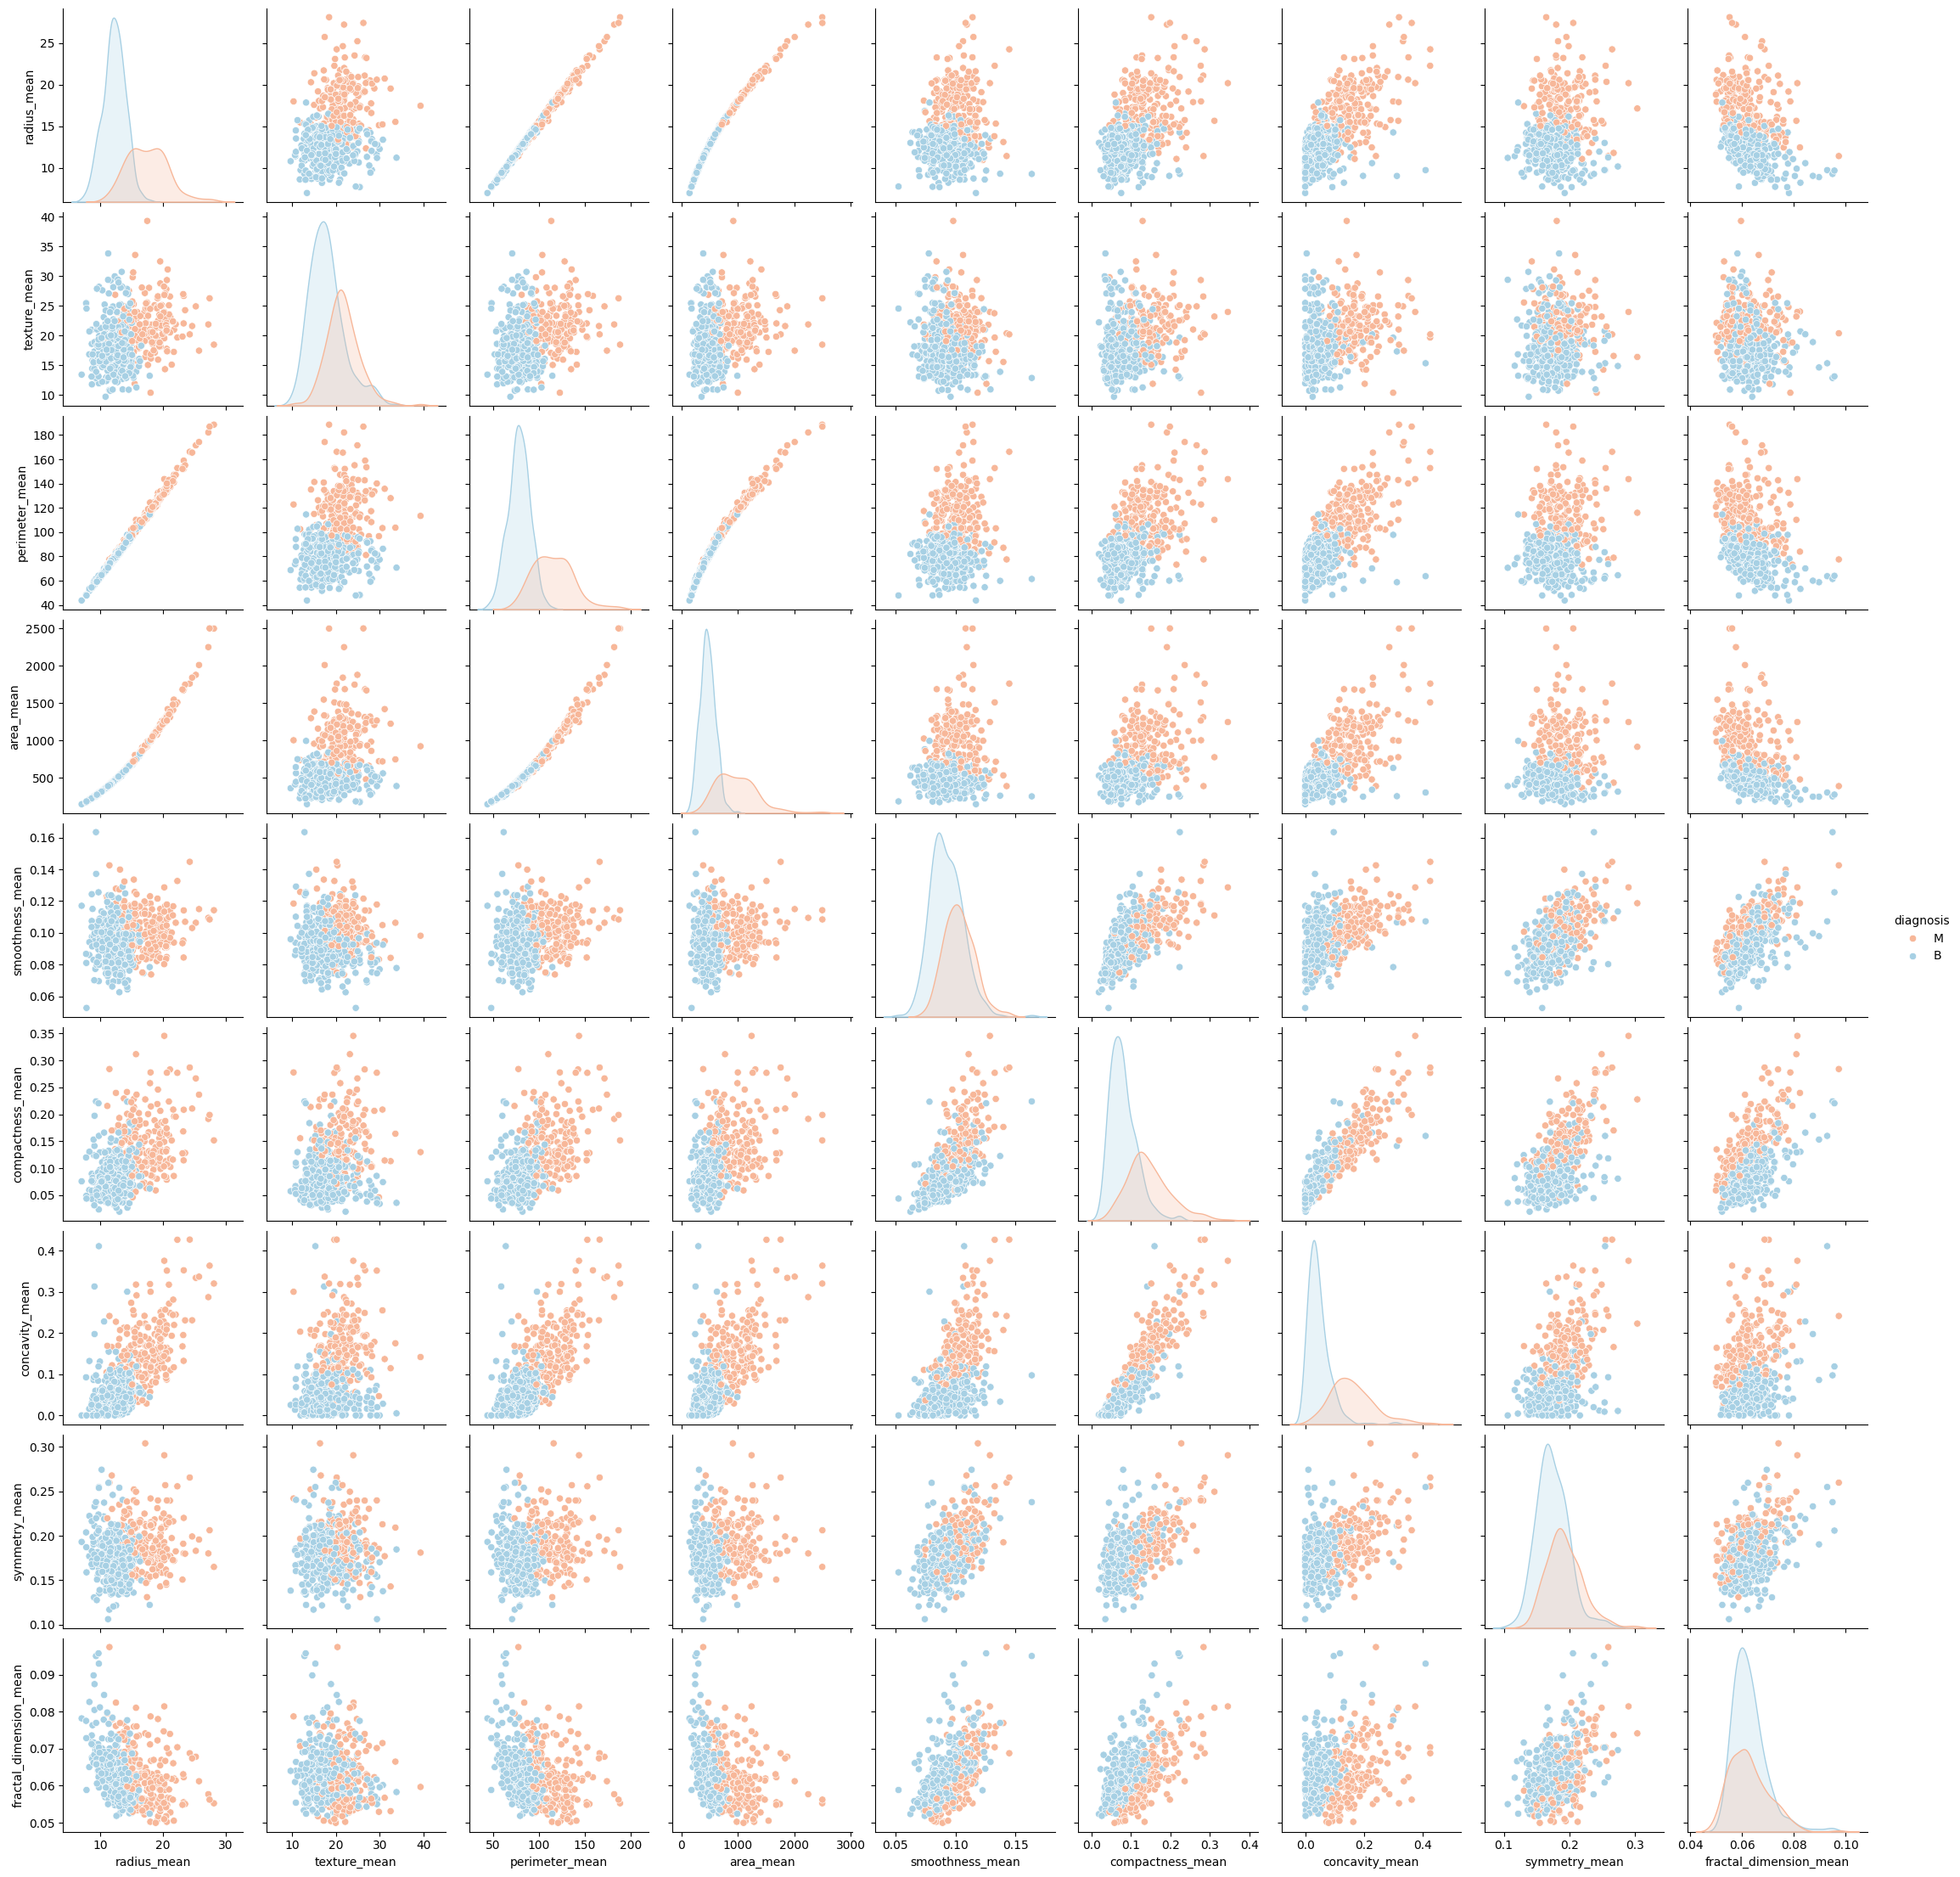

In [ ]:
cols=['diagnosis','radius_mean','texture_mean','perimeter_mean','area_mean',
      'smoothness_mean','compactness_mean','concavity_mean','symmetry_mean','fractal_dimension_mean']

sns.pairplot(data=data[cols],hue='diagnosis',palette='RdBu')

Correlation Matrix Data Visualization

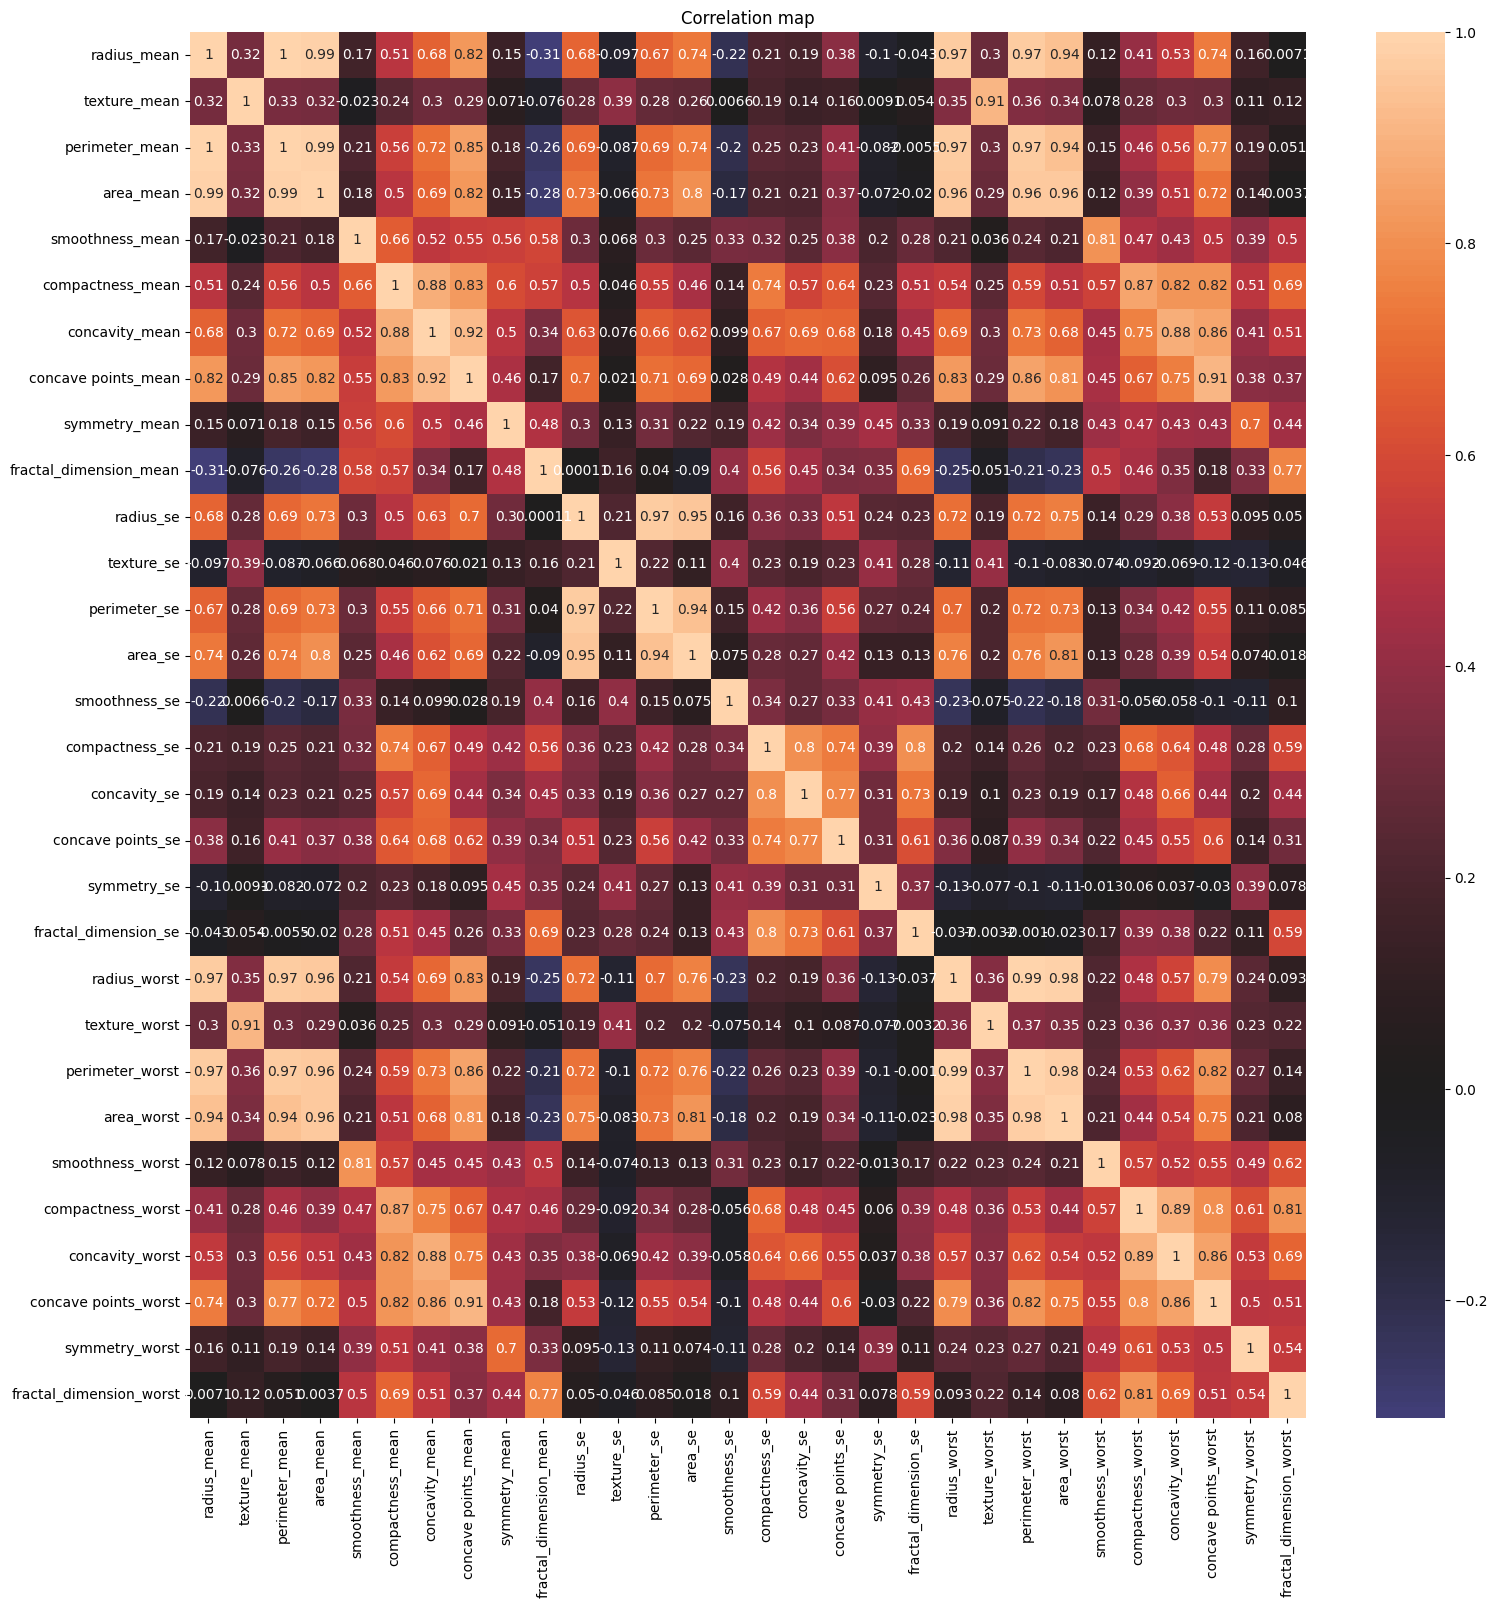

In [ ]:
# To get accurate data visualization remove multi colinearity it means remove
#-the duplicate columns
# Check the correlation between features
# Analysis only for features_mean
# Visualize correlations by heatmap

plt.figure(figsize=(18,18))
sns.heatmap(data.drop('diagnosis', axis=1).corr(), center=0, annot=True)
plt.title('Correlation map')
plt.show()

Above "Correlation Matrix" visualize the corelations between the features with the feature mean using the heatmap.

**Appling the ML Algorithmn**

Splitting feature labels and data set into test and train sets

In [ ]:
# Split the feature labels

# Drop the 'diagnosis' column which represent the feacture which we are going to predict
x=data.drop(['diagnosis'],axis=1,inplace=False)

# Assign 'diagnosis' column to Y varible
y=data['diagnosis']

print(x.head(2))
print(y.head(2))

   radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0        17.99         10.38           122.8     1001.0          0.11840   
1        20.57         17.77           132.9     1326.0          0.08474   

   compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   

   fractal_dimension_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0                 0.07871  ...         25.38          17.33            184.6   
1                 0.05667  ...         24.99          23.41            158.8   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0                0.2654

In [ ]:
# Seperate the data set by 70/30 for training and testing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size =0.3, random_state=42)
print(x_train.shape, ' \t is the shape of training features')
print(y_train.shape,' \t is the shape of training lables')
print(x_test.shape,' \t is the shape of testing features')
print(y_test.shape,' \t is the shape of testing lables')

(398, 30)  	 is the shape of training features
(398,)  	 is the shape of training lables
(171, 30)  	 is the shape of testing features
(171,)  	 is the shape of testing lables


Build the predictive model by appling K-Nearest Neighbors (KNN) algorithm

In [ ]:
# Implementation of KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [ ]:
#KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski', metric_params=None, n_jobs=None, n_neighbors=5, p=2, weights='uniform')

Perform 10-fold cross validation

In [ ]:
from sklearn.model_selection import cross_val_score     # Use cross_val_score function

neighbors=[]  # Empty list to store neighbors
cv_scores=[] # Empty list to store scores
# Perform 10-fold cross validation with K=5 for KNN (the n_neighbors parameter)
for k in range(1, 51, 2): # Range of K we want to try
  neighbors.append(k)
  knn=KNeighborsClassifier(n_neighbors=k)   # k = 5 for KNeighborsClassifier
  scores=cross_val_score(
    knn,x_train, y_train, cv=10, scoring= 'accuracy')
  cv_scores.append(scores.mean())
# Passing the entirety of X and y, not X_train or y_train, it takes care of splitting the data
# cv=10 for 10 folds
# Scoring='accuracy' for evaluation metric
  scores=cross_val_score(knn,x,y,cv=10,scoring='accuracy')
  print(scores)

[0.92982456 0.84210526 0.92982456 0.92982456 0.9122807  0.89473684
 0.92982456 0.94736842 0.89473684 0.94642857]
[0.9122807  0.85964912 0.89473684 0.94736842 0.94736842 0.94736842
 0.96491228 0.94736842 0.9122807  0.92857143]
[0.9122807  0.87719298 0.89473684 0.96491228 0.94736842 0.92982456
 0.96491228 0.92982456 0.9122807  0.96428571]
[0.92982456 0.85964912 0.9122807  0.96491228 0.92982456 0.92982456
 0.96491228 0.92982456 0.9122807  0.94642857]
[0.87719298 0.85964912 0.9122807  0.96491228 0.94736842 0.92982456
 0.96491228 0.92982456 0.9122807  0.96428571]
[0.87719298 0.85964912 0.9122807  0.96491228 0.96491228 0.92982456
 0.96491228 0.94736842 0.9122807  0.96428571]
[0.87719298 0.85964912 0.9122807  0.96491228 0.96491228 0.94736842
 0.96491228 0.94736842 0.9122807  0.96428571]
[0.87719298 0.85964912 0.9122807  0.96491228 0.96491228 0.92982456
 0.96491228 0.94736842 0.9122807  0.96428571]
[0.87719298 0.85964912 0.9122807  0.96491228 0.96491228 0.9122807
 0.96491228 0.94736842 0.92982

Find optimal K value

The Optimal number of K neighbors = 13


NameError: name 'Plt' is not defined

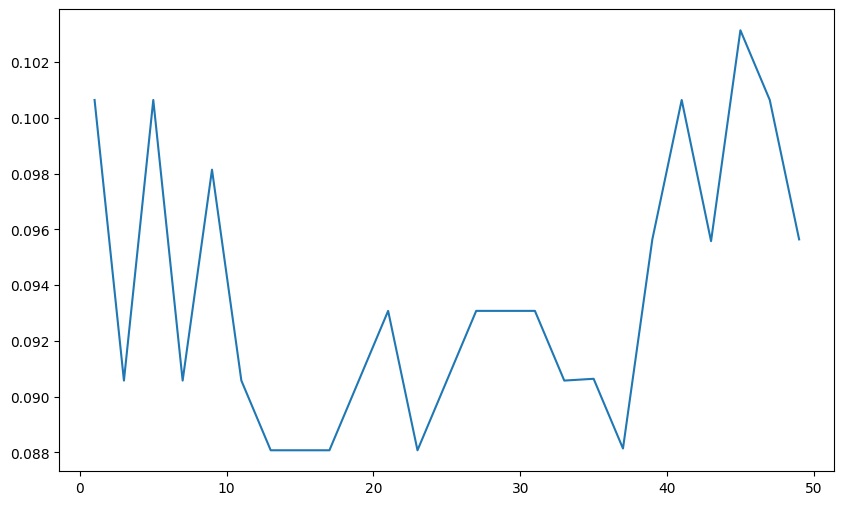

In [ ]:
# Misclassification error versus k
MSE=[1-x for x in cv_scores] # Changing to misclassification error
# Determining the best k value
optimal_k=neighbors[MSE.index(min(MSE))]
print('The Optimal number of K neighbors = %d' %optimal_k)
# Plot misclassification error versus k
plt.figure(figsize=(10,6))
plt.plot(neighbors,MSE)
Plt.xlable('Number of k neighbors')
plt.ylabel('Misclassification Error')
plt.show()


Accuracy of the prediction

Classification Report

In [ ]:
model=KNeighborsClassifier(n_neighbors=13)
model.fit(x_train, y_train)
y_pred=model.predict(x_test)
# Generate the summary of the predictions
# (Classification Report) made by the classifier
from sklearn.metrics import classification_report
print("Classification Report : \n\n")
print(classification_report(y_test, y_pred))

Classification Report : 


              precision    recall  f1-score   support

           B       0.96      0.99      0.97       108
           M       0.98      0.92      0.95        63

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.97      0.96      0.96       171



Accuracy Score

In [ ]:
# Accuracy score of the prediction
from sklearn.metrics import accuracy_score
print('Accuracy of brest cancer prediction using KNN=', accuracy_score(y_pred,y_test)*100)

Accuracy of brest cancer prediction using KNN= 96.49122807017544


Accuracy Visualization

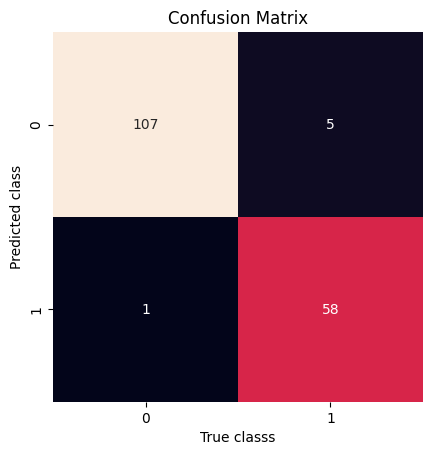

In [ ]:
# Based on the test values generate the confusion matrix
from sklearn.metrics import confusion_matrix
# Summary of the predictions made by the classifier
import matplotlib.pyplot as plt
import seaborn as sns
mat=confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d',cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('True classs')
plt.ylabel('Predicted class')
plt.show()